# Data Science, Prediction, and Forecasting - Assignment 4

## The curse of dimensionality

Building on the last assignments, let's repeat our sampling approximation of $\pi$ in more dimensions than two. In three dimensions, the volume of a ball of radius $r$ is $\frac{4}{3}\pi r^3$. Sampling from a cube with side length 2 and checking whether our samples are inside the unit sphere then gives us

$$\frac{\text{Volume of unit sphere}}{\text{Volume of sampling region}} = \frac{4\pi / 3}{2^3} \approx \frac{\text{Number of }(x_1, x_2, x_3)\text{-Samples with }\sqrt{x_1^2 + x_2^2 + x_3^2} \leq 1}{\text{Total number of samples}}.$$

and

$$\pi \approx 6 \cdot \frac{\text{Number of }(x_1, x_2, x_3)\text{-Samples with }\sqrt{x_1^2 + x_2^2 + x_3^2} \leq 1}{\text{Total number of samples}}.$$


1. Implement this in Python and show graphically how your approximation evolves in the course of sampling.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def estimate_pi_3d_history(n):
    """Estimate pi using n samples and keep track of the history of estimates."""
    # Sample x's
    x1 = np.random.uniform(-1, 1, n)
    x2 = np.random.uniform(-1, 1, n)
    x3 = np.random.uniform(-1, 1, n)

    # Cumulative sum of the number of points inside the circle
    inside = np.cumsum(x1**2 + x2**2 + x3**2 <= 1)    

    # Evolution of pi estimates
    pi_history = 6 * inside / np.arange(1, n+1)

    return pi_history

In [3]:
# Create a history of pi estimates
pi_3d_history = estimate_pi_3d_history(5000)

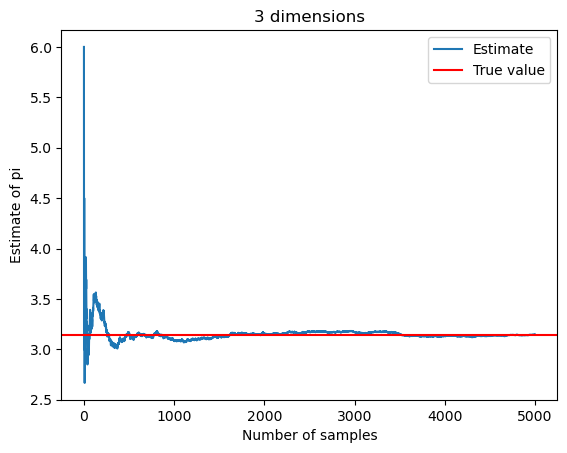

In [4]:
# Plot the history of pi estimates
plt.plot(pi_3d_history)
# Horizontal line at the true value of pi
plt.axhline(np.pi, color='r')
# Labels and legend
plt.title('3 dimensions')
plt.xlabel('Number of samples')
plt.ylabel('Estimate of pi')
plt.legend(['Estimate', 'True value'])
plt.show()

2. Now do the same in 10 dimensions. The volume of a 10-dimensional sphere of radius $r$ is $\frac{\pi^5}{120}r^5$.


By the same rational above, we now have

$$\pi^5 \approx 120 \cdot 2^{10} \cdot \frac{\text{Number of }(x_1, x_2,\ldots, x_{10})\text{-Samples with }\sqrt{x_1^2 + x_2^2 + \ldots + x_{10}^2} \leq 1}{\text{Total number of samples}},$$

which means

$$\pi \approx \left( 122880 \cdot \frac{\text{Number of }(x_1, x_2,\ldots, x_{10})\text{-Samples with }\sqrt{x_1^2 + x_2^2 + \ldots + x_{10}^2} \leq 1}{\text{Total number of samples}} \right)^\frac{1}{5},$$


In [5]:
def estimate_pi_10d_history(n):
    """Estimate pi using n samples and keep track of the history of estimates."""
    # An n-by-10 matrix of random number from -1 to 1
    X = np.random.uniform(-1, 1, (n, 10))    
    
    # The square of the vector norm of each row
    norms = np.sum(X**2, axis=1)
    
    # Cumulative sum of the number of points inside the circle
    inside = np.cumsum(norms <= 1)    

    # Evolution of pi estimates
    pi_history = (122880 * inside / np.arange(1, n+1))**0.2

    return pi_history

In [6]:
# Create a history of pi estimates
pi_10d_history = estimate_pi_10d_history(5000)

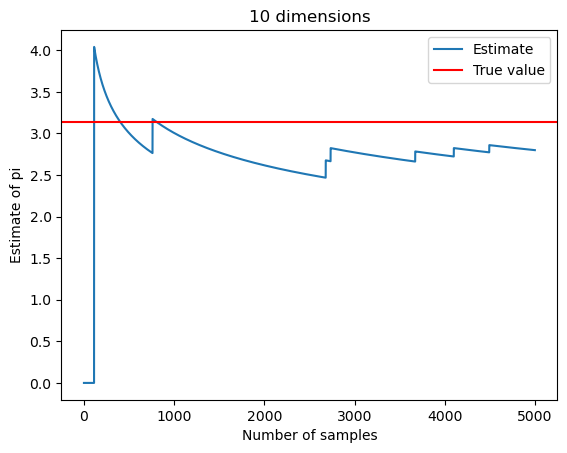

In [7]:
# Plot the history of pi estimates
plt.plot(pi_10d_history)
# Horizontal line at the true value of pi
plt.axhline(np.pi, color='r')
# Labels and legend
plt.title('10 dimensions')
plt.xlabel('Number of samples')
plt.ylabel('Estimate of pi')
plt.legend(['Estimate', 'True value'])
plt.show()

3. Finally, try doing  the same in 16 dimensions. Find out the volume of such a sphere yourself. What do you notice?

The volume of such a sphere is $\frac{\pi^8 r^{16}}{40320}.$

In [8]:
def estimate_pi_16d_history(n):
    """Estimate pi using n samples and keep track of the history of estimates."""
    # An n-by-10 matrix of random number from -1 to 1
    X = np.random.uniform(-1, 1, (n, 16))    
    
    # The square of the vector norm of each row
    norms = np.sum(X**2, axis=1)
    
    # Cumulative sum of the number of points inside the circle
    inside = np.cumsum(norms <= 1)    

    # Evolution of pi estimates
    pi_history = (40320 * 2**16 * inside / np.arange(1, n+1))**0.125

    return pi_history

In [9]:
# Create a history of pi estimates
pi_16d_history = estimate_pi_16d_history(1000000)

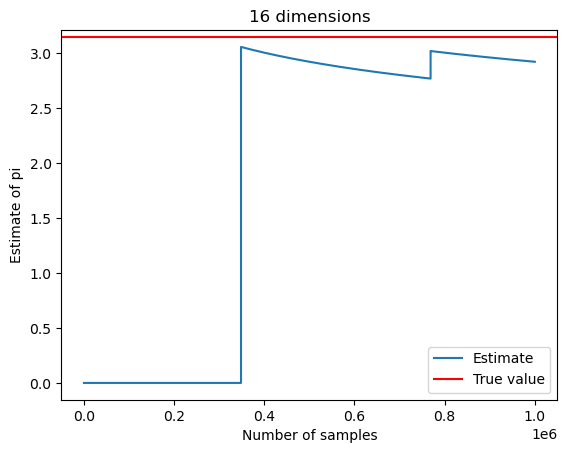

In [10]:
# Plot the history of pi estimates
plt.plot(pi_16d_history)
# Horizontal line at the true value of pi
plt.axhline(np.pi, color='r')
# Labels and legend
plt.title('16 dimensions')
plt.xlabel('Number of samples')
plt.ylabel('Estimate of pi')
plt.legend(['Estimate', 'True value'])
plt.show()

The thing to notice is that as we increase dimensions, fewer and fewer samples are inside the sphere. This means it takes more and more samples for the estimate to converge on $\pi$. This is one manifestation of the so-called curse of dimensionality.

## Decision theory

A test for a disease has a *sensitivity* of 0.99 *specificity* of 0.95 (look up those terms). Its prevalence at the population level is 1 in 1,000.

1. A random person from the population tests positive. What is the probability that this person has the disease? Use probability theory to give the answer.


Probability theory tells us

$$ \mathrm{Pr}(\text{disease = yes} | \text{test = positive}) = \frac{\mathrm{Pr}( \text{test = positive} | \text{disease = yes}) \cdot \mathrm{Pr}( \text{disease = yes})}{\mathrm{Pr}( \text{test = positive})}. $$

For better readability, we simplify the notation to

$$ \mathrm{Pr}(d | +) = \frac{\mathrm{Pr}(+ | d) \cdot \mathrm{Pr}(d)}{\mathrm{Pr}(+)}, $$

and we note that probability theory also tells us that

$$ \mathrm{Pr}(+) = \mathrm{Pr}(+,d) + \mathrm{Pr}(+ , \lnot d) = \mathrm{Pr}(+|d) \cdot \mathrm{Pr}(d) + \mathrm{Pr}(+ | \lnot d) \cdot \mathrm{Pr}(\lnot d), $$

where $\lnot d$ means 'disease = no'. This leaves us with

$$ \mathrm{Pr}(d | +) = \frac{\mathrm{Pr}(+ | d) \cdot \mathrm{Pr}(d)}{\mathrm{Pr}(+ | d) \cdot \mathrm{Pr}(d) + \mathrm{Pr}(+ | \lnot d) \cdot \mathrm{Pr}(\lnot d)}. $$

Fortunately, we know all the quantities on the right-hand side:

$ \mathrm{Pr}(+ | d) = 0.99, $

$ \mathrm{Pr}(d) = 0.001, $

$ \mathrm{Pr}(+|\lnot d) = 0.05 $, and

$ \mathrm{Pr}(\lnot d) = 0.999. $

This gives us

$$ \mathrm{Pr}(d | +) = \frac{0.99 \cdot 0.001}{0.99 \cdot 0.001 + 0.05 \cdot 0.999} \approx 0.019 . $$

2. The same person is tested a second time and the test comes back positive again. Use probability theory to explain how this affects the probability that the person has the disease.

We now need to calculate the probability $\mathrm{Pr}(d | ++)$ of disease after two positive tests. This is

$$ \mathrm{Pr}(d | ++) = \frac{\mathrm{Pr}(+ | d,+) \cdot \mathrm{Pr}(d | +)}{\mathrm{Pr}(+ | d,+) \cdot \mathrm{Pr}(d | +) + \mathrm{Pr}(+ | \lnot d,+) \cdot \mathrm{Pr}(\lnot d | +)}. $$

Since tests are independent of each other, we have $\mathrm{Pr}(+ | d,+) = \mathrm{Pr}(+ | d)$ and $\mathrm{Pr}(+ | \lnot d,+) = \mathrm{Pr}(+ | \lnot d)$. $\mathrm{Pr}(d | +)$ and $\mathrm{Pr}(\lnot d | +)$ are known from above. So we have

$$ \mathrm{Pr}(d | ++) = \frac{0.99 \cdot 0.019}{0.99 \cdot 0.019 + 0.05 \cdot 0.981} \approx 0.28 . $$


3. Create a Python program that gives answers to 1. and 2. using sampling.


In [11]:
# Function that determines the probability of having the disease after a positive test by sampling
def sample_prob_positive_given_disease(n, sensitivity, specificity, base_rate):
    """Sample the probability of having the disease after a positive test."""
    # Sample n people with the disease and without the disease using a binomial distribution
    people = np.random.binomial(1, p=base_rate, size=n)
    
    # Sample the test results by looping over the people
    test_results = np.zeros(n)
    for i in range(n):
        if people[i] == 1:
            test_results[i] = np.random.binomial(1, p=sensitivity)
        else:
            test_results[i] = np.random.binomial(1, p=1-specificity)

    # The number of people with the disease who tested positive
    positive_given_disease = np.sum(people * test_results)
    
    # The number of people without the disease who tested positive
    positive_given_no_disease = np.sum((1-people) * test_results)
    
    # The probability of having the disease after a positive test
    prob_positive_given_disease = positive_given_disease / (positive_given_disease + positive_given_no_disease)

    return prob_positive_given_disease


In [12]:
sample_prob_positive_given_disease(1000000, 0.99, 0.95, 0.001)

0.020043486855109705

4. Define a loss matrix for deciding whether to give treatment based on one or more test results. Discuss the assumptions behind the matrix and its implications.

One possible loss matrix is

$$ \begin{bmatrix}
    0 & 2 \\
    1 & 0
    \end{bmatrix}. $$

Here we assume that true positives (top left) and true negatives (bottom right) carry no cost because they are correct classifications. False negatives (top right) are assumed to be twice as costly as false positives. While this still overweights false negatives, the weighting is not as extreme as that often implied in public health policy, where there often is an implicit assumption that the cost of doing too much is negligible compared to the cost of doing too little.